## Assignment- Advanced Regression


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house

How well those variables describe the price of a house

## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Exploration

In [4]:
house.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
# summary of the dataset: 1460 rows, 81 columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house.describe()      #other atributes of the dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

In [10]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


### Outlier Treatment

In [11]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


(1453, 81)

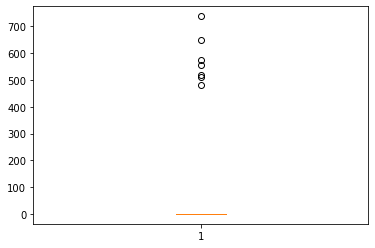

In [12]:
# outlier treatment
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

(1402, 81)

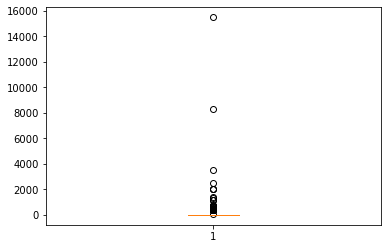

In [13]:
# outlier treatment
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

(1291, 81)

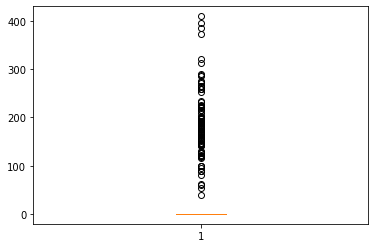

In [14]:
# outlier treatment
plt.boxplot(house['ScreenPorch'])
Q1 = house['ScreenPorch'].quantile(0.1)
Q3 = house['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house['ScreenPorch'] <= Q3 + 1.5*IQR)]
house.shape

(1274, 81)

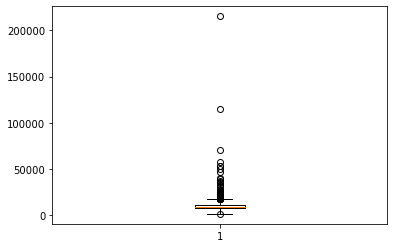

In [15]:
# outlier treatment
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

(1255, 81)

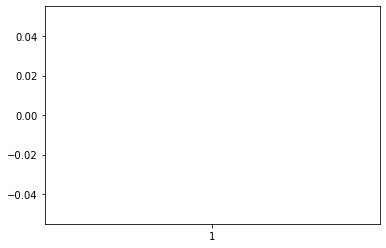

In [16]:
# outlier treatment
plt.boxplot(house['MasVnrArea'])
Q1 = house['MasVnrArea'].quantile(0.1)
Q3 = house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house['MasVnrArea'] <= Q3 + 1.5*IQR)]
house.shape

(1253, 81)

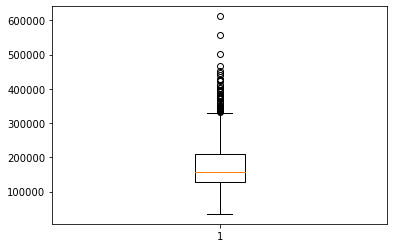

In [17]:
# outlier treatment
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

## Checking the Correlation between the variables

In [18]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


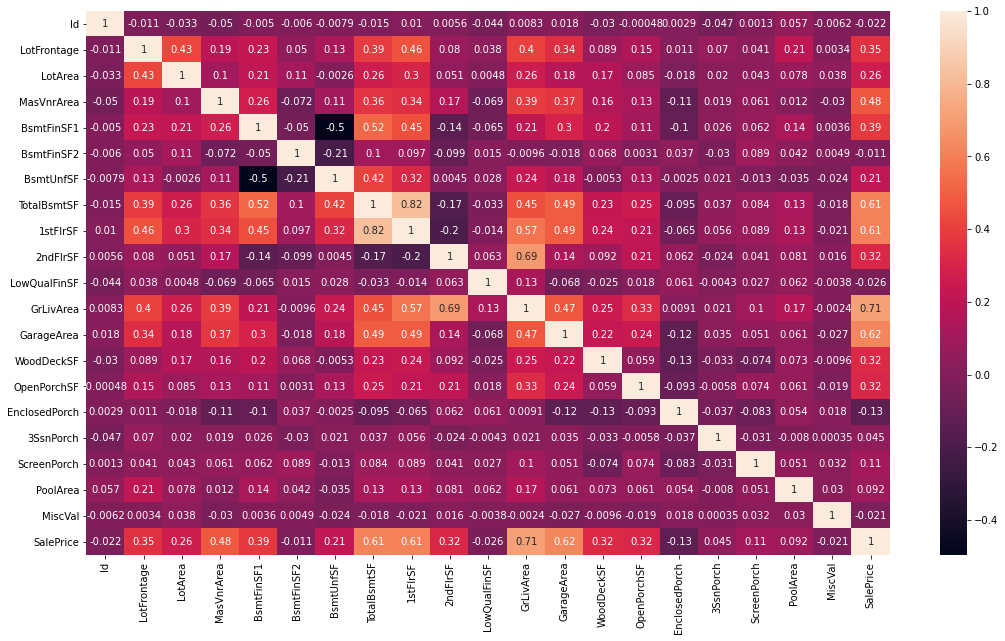

In [19]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are some missing values in the dataset. We've also seen that variables are in the correct format, except some variables with distinct values, which should rather be categorical variables (so that dummy variable are created for the categories).

In [20]:
# variable formats
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1040 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [21]:
house.isnull().sum()  #checking the number of null values in the dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [22]:
# Checking the percentage of missing values
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

## Null value treatment
Instead of dropping the null values which will result in a data loss, we will impute the null values according to the domain understanding and the data dictionary provided with the data.

In [23]:
house.shape

(1253, 81)

In [24]:
house = pd.concat((house,test))

In [25]:
#NA in Alley column means No Alley, so we will replace NA by it.
house['Alley'].fillna('No Alley', inplace=True)

In [26]:
house['MasVnrType'].fillna('None', inplace=True) 

In [27]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [28]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
house['PoolQC'].fillna('No Pool', inplace=True) 

In [29]:
#NA in Fence column means No Fence, so we will replace NA by it.
house['Fence'].fillna('No Fence', inplace=True) 

In [30]:
house['MasVnrArea'].fillna(0, inplace=True) 

In [31]:
house['LotFrontage'].fillna(0, inplace=True) 

In [32]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

In [33]:
# MiscFeature column has almost 99% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

In [34]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [35]:
#converting year to number of years
house['YearBuilt'] = 2019 - house['YearBuilt']
house['YearRemodAdd'] = 2019 - house['YearRemodAdd']
house['GarageYrBlt'] = 2019 - house['GarageYrBlt']
house['YrSold'] = 2019 - house['YrSold']

In [36]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [37]:
house.shape

(2712, 80)

In [38]:
final = house

## Dummy Variables

In [39]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
final[varlist1] = final[varlist1].apply(binary_map)

In [40]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
final[varlist2] = final[varlist2].apply(binary_map)

In [41]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [42]:
# split into X and y
X = final.drop([ 'Id'], axis=1)


In [43]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [44]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# drop categorical variables 
final = final.drop(list(house_categorical.columns), axis=1)

In [46]:
# concat dummy variables with X
final = pd.concat([final, house_dummies], axis=1)

In [47]:
final.shape

(2712, 310)

In [48]:
test = final.tail(1459)

In [49]:
test.shape

(1459, 310)

In [50]:
X = final.head(1253)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

In [51]:
test = test.fillna(test.interpolate())


In [52]:
X = X.fillna(X.interpolate())

In [53]:
test = test.drop("SalePrice",1) # take out the target variable

In [54]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [55]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)

StandardScaler()

In [71]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_train_predict = lin_model.predict(X_train)
r2 =metrics.r2_score(y_train, y_train_predict)
print(r2)
y_test_predict=lin_model.predict(X_test)
r2_test =metrics.r2_score(y_test, y_test_predict)
print(r2_test)





0.963304135748098
0.861042876378896
RMSE is: 
 0.01931944498427707


## Ridge Regression

In [82]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 4
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 4 folds for each of 28 candidates, totalling 112 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:    1.7s finished


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.07687577247854142


In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.010504,0.003476,0.004675,0.002919,0.0001,{'alpha': 0.0001},-0.101217,-0.127786,-0.085333,-0.083628,-0.099491,0.017718,28,-0.046167,-0.045473,-0.047608,-0.050744,-0.047498,0.002026
1,0.012125,0.002180,0.002506,0.002224,0.001,{'alpha': 0.001},-0.100902,-0.126940,-0.085297,-0.082851,-0.098997,0.017556,27,-0.046210,-0.045505,-0.047618,-0.050807,-0.047535,0.002036
2,0.011149,0.003027,0.000974,0.001183,0.01,{'alpha': 0.01},-0.099982,-0.120701,-0.084979,-0.080939,-0.096650,0.015593,25,-0.046521,-0.045779,-0.047728,-0.051285,-0.047828,0.002114
3,0.007760,0.004933,0.005016,0.003408,0.05,{'alpha': 0.05},-0.096331,-0.110030,-0.083819,-0.077241,-0.091855,0.012535,23,-0.047283,-0.046543,-0.048163,-0.052212,-0.048550,0.002190
4,0.006238,0.003086,0.002173,0.003765,0.1,{'alpha': 0.1},-0.093763,-0.104831,-0.082897,-0.075020,-0.089128,0.011247,22,-0.047836,-0.047168,-0.048505,-0.052818,-0.049082,0.002208
5,0.007646,0.004667,0.004012,0.004013,0.2,{'alpha': 0.2},-0.090467,-0.099898,-0.081869,-0.073106,-0.086335,0.009950,20,-0.048507,-0.048030,-0.049011,-0.053554,-0.049776,0.002209
6,0.006043,0.005559,0.004269,0.004285,0.3,{'alpha': 0.3},-0.088471,-0.097229,-0.081211,-0.072001,-0.084728,0.009282,19,-0.048979,-0.048614,-0.049365,-0.054072,-0.050257,0.002218
7,0.008771,0.004562,0.004349,0.004377,0.4,{'alpha': 0.4},-0.087098,-0.095335,-0.080685,-0.071191,-0.083577,0.008838,17,-0.049383,-0.049042,-0.049654,-0.054455,-0.050634,0.002217
8,0.007504,0.003970,0.004001,0.004001,0.5,{'alpha': 0.5},-0.086050,-0.093938,-0.080285,-0.070593,-0.082716,0.008514,16,-0.049732,-0.049381,-0.049900,-0.054779,-0.050948,0.002220
9,0.009074,0.001267,0.002249,0.003345,0.6,{'alpha': 0.6},-0.085167,-0.092800,-0.079944,-0.070084,-0.081999,0.008260,15,-0.050043,-0.049650,-0.050137,-0.055055,-0.051221,0.002221


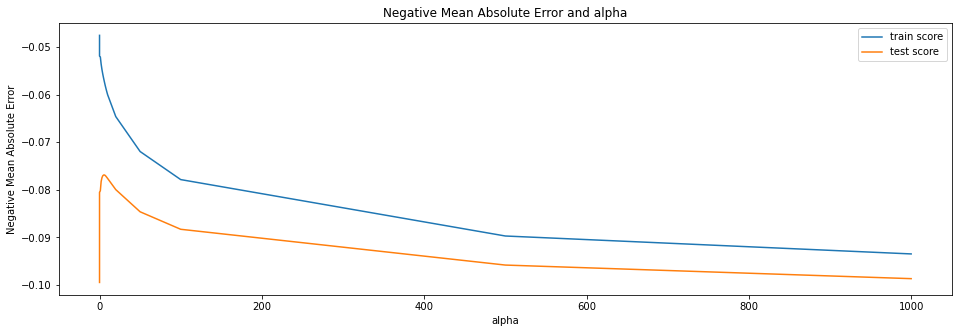

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### from the above graph and the best_param_ score we got optimum lambda to be 4

In [86]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.08442335e-05, -1.29476419e-04,  8.64982823e-06, -2.08529167e-02,
        0.00000000e+00, -2.80940988e-03, -1.17578887e-03,  2.14798318e-05,
        5.95430693e-05,  6.69135844e-05, -2.28352014e-05,  1.03621447e-04,
        3.77558156e-02,  7.70920892e-05,  1.14943383e-04, -8.32109680e-06,
        1.83714367e-04,  5.25783543e-04,  1.35751439e-04,  1.18398461e-04,
        2.24007508e-04,  1.19009185e-04,  2.24073414e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.06780542e-04,  3.26827206e-04,
       -1.15084205e-02,  9.11182461e-03,  2.20253648e-02,  5.56730762e-03,
       -3.99914159e-02,  4.85513943e-02,  2.26983416e-02, -2.19904813e-02,
       -1.56052054e-02, -1.72139518e-02,  2.21571433e-02,  0.00000000e+00,
       -6.66657945e-02, -1.65480922e-02,  5.31897676e-03,  6.97223400e-02,
        1.14903888e-02,  2.89003386e-02,  3.36333979e-03,  2.09400529e-02,
        3.67571188e-02, -1.14787413e-02, -4.86678885e-02,  5.43167310e-03,
        1.61830186e-02, -

In [87]:
#lets predict the R-squared value of test and train data
from sklearn.metrics import mean_squared_error
y_train_pred = ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))


0.9543534179988408
0.8860189268037152
RMSE is: 
 0.01931944498427707


 Lasso

In [66]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.104581,0.037051,0.004153,0.002790,0.0001,{'alpha': 0.0001},-0.084353,-0.075172,-0.080517,-0.080684,...,-0.076307,0.008282,1,-0.051724,-0.052959,-0.052804,-0.052213,-0.057217,-0.053384,0.001967
1,0.018752,0.006800,0.000405,0.000496,0.001,{'alpha': 0.001},-0.083513,-0.082241,-0.086239,-0.081683,...,-0.080028,0.006962,2,-0.066716,-0.067696,-0.065153,-0.068256,-0.070302,-0.067624,0.001703
2,0.008237,0.002808,0.001859,0.003241,0.01,{'alpha': 0.01},-0.102980,-0.103797,-0.107636,-0.104642,...,-0.101069,0.007555,3,-0.096992,-0.096701,-0.095088,-0.097794,-0.101147,-0.097544,0.002004
3,0.028578,0.003503,0.004118,0.002156,0.05,{'alpha': 0.05},-0.104493,-0.107558,-0.110196,-0.107669,...,-0.103796,0.007584,6,-0.100418,-0.099105,-0.097898,-0.100149,-0.104158,-0.100346,0.002103
4,0.028836,0.003733,0.004110,0.001106,0.1,{'alpha': 0.1},-0.103231,-0.107880,-0.110775,-0.107862,...,-0.103777,0.007708,5,-0.100783,-0.099208,-0.098105,-0.100243,-0.104449,-0.100558,0.002151
5,0.023923,0.006287,0.002539,0.002366,0.2,{'alpha': 0.2},-0.101457,-0.108667,-0.111706,-0.108050,...,-0.103747,0.008161,4,-0.100996,-0.099659,-0.098514,-0.100403,-0.104728,-0.100860,0.002104
6,0.019747,0.007481,0.004655,0.004644,0.3,{'alpha': 0.3},-0.101585,-0.109304,-0.112625,-0.108288,...,-0.104210,0.008296,7,-0.101680,-0.100168,-0.099262,-0.100870,-0.105325,-0.101461,0.002090
7,0.015024,0.003488,0.001828,0.002265,0.4,{'alpha': 0.4},-0.102175,-0.109999,-0.113650,-0.108569,...,-0.104880,0.008310,8,-0.102411,-0.100861,-0.100096,-0.101605,-0.106033,-0.102201,0.002065
8,0.010942,0.000770,0.003939,0.002271,0.5,{'alpha': 0.5},-0.102913,-0.110751,-0.114802,-0.108578,...,-0.105640,0.008197,9,-0.103283,-0.101746,-0.101224,-0.102399,-0.106904,-0.103111,0.002017
9,0.011149,0.000960,0.003362,0.001893,0.6,{'alpha': 0.6},-0.103793,-0.111564,-0.116410,-0.108536,...,-0.106579,0.008109,10,-0.104246,-0.102732,-0.102433,-0.103304,-0.107883,-0.104120,0.001981


In [68]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [69]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.095017,0.031116,0.004996,0.002360,0.0001,{'alpha': 0.0001},0.908154,0.898766,0.918740,0.895581,...,0.913287,0.017881,1,0.963687,0.963599,0.959523,0.963947,0.957308,0.961613,0.002705
1,0.017975,0.002446,0.004144,0.003302,0.001,{'alpha': 0.001},0.915172,0.896825,0.905315,0.905100,...,0.911172,0.012564,2,0.937314,0.940184,0.936955,0.938496,0.935029,0.937595,0.001708
2,0.010017,0.000697,0.003841,0.004018,0.01,{'alpha': 0.01},0.879692,0.835426,0.860768,0.833447,...,0.855782,0.018439,3,0.862387,0.870386,0.865896,0.871295,0.865295,0.867052,0.003326
3,0.031738,0.006528,0.003004,0.002702,0.05,{'alpha': 0.05},0.875506,0.823165,0.852224,0.826389,...,0.847096,0.019790,5,0.850681,0.863089,0.856738,0.863398,0.856413,0.858064,0.004748
4,0.029859,0.004914,0.004139,0.000985,0.1,{'alpha': 0.1},0.877591,0.822462,0.850550,0.827330,...,0.847178,0.020285,4,0.849466,0.862733,0.856138,0.862251,0.855419,0.857201,0.004904
5,0.024853,0.008681,0.004982,0.002579,0.2,{'alpha': 0.2},0.880167,0.819668,0.847828,0.827947,...,0.846560,0.021511,6,0.847928,0.861685,0.854926,0.861120,0.854380,0.856008,0.005049
6,0.020230,0.007116,0.003373,0.003082,0.3,{'alpha': 0.3},0.880831,0.816835,0.844628,0.828054,...,0.845246,0.022282,7,0.845629,0.860273,0.853090,0.859441,0.852844,0.854255,0.005308
7,0.013605,0.003210,0.004260,0.002060,0.4,{'alpha': 0.4},0.880534,0.813327,0.840908,0.827537,...,0.843242,0.023028,8,0.843439,0.858297,0.850926,0.857340,0.850953,0.852191,0.005358
8,0.014980,0.001730,0.002421,0.000379,0.5,{'alpha': 0.5},0.879737,0.809349,0.836593,0.827574,...,0.840889,0.023689,9,0.840714,0.855864,0.848171,0.855321,0.848542,0.849722,0.005550
9,0.013743,0.001362,0.003246,0.000631,0.6,{'alpha': 0.6},0.878517,0.805988,0.831923,0.827807,...,0.838398,0.024090,10,0.837541,0.853587,0.845060,0.853122,0.845590,0.846980,0.005934


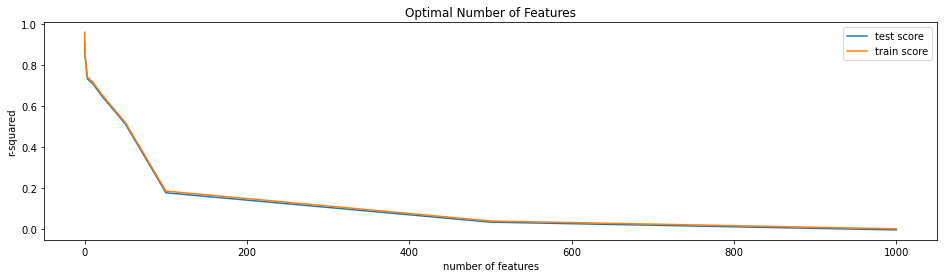

In [70]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [71]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.07630744921613344


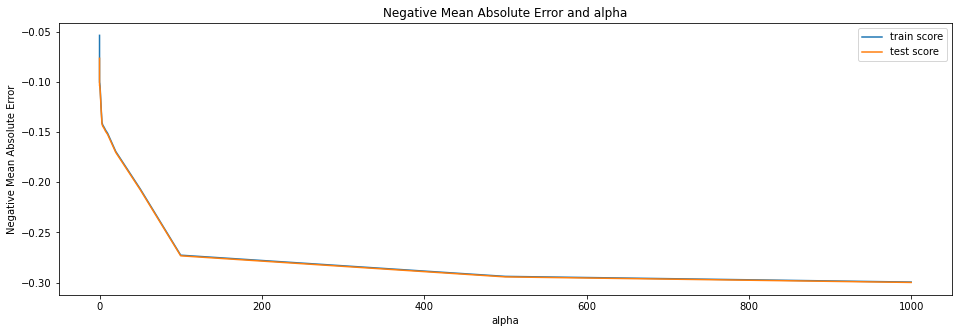

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### from the above graph and the best_param_ score we got optimum lambda to be 0.0001

In [73]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [74]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))


0.9575119031855726


In [75]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [76]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8818744660675767


In [77]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.020021918464619183


In [90]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(test)
final_predictions = np.exp(preds)




In [91]:
test.index = test.index + 1461

In [95]:
submission = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions })

submissiontrial = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions })

In [96]:
submission.head(5)



,Id,SalePrice
0,1461,119599.156045
1,1462,155560.639747
2,1463,202537.317501
3,1464,201609.123333
4,1465,181245.355148


predictions using ridge

,Id,SalePrice
0,1461,119599.156045
1,1462,155560.639747
2,1463,202537.317501
3,1464,201609.123333
4,1465,181245.355148


In [82]:
alpha = 4

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
preds1 = ridge.predict(test)
final_predictions1 = np.exp(preds1)

In [83]:
submission1 = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions1 })


In [84]:
submission1.head(20)

,Id,SalePrice
0,1461,119670.376779
1,1462,158159.031833
2,1463,203458.842110
3,1464,202362.661692
4,1465,177606.073857
5,1466,173984.639107
6,1467,180838.135009
7,1468,164800.111180
8,1469,178787.340900
9,1470,125756.735826
